# Espalhamento e Tunelamento Quântico

* Matéria: Física Quântica
* Aluno: José Arthur de Luna Oliveira
* Professor: Bruno Ricardo de Carvalho
* Data: 31/05/2024

$\quad$ Neste trabalho discutiremos sobre o espalhamento e tunelamento quântico.

Neste `Notebook` haverá as seguintes seções:

* Introdução;
* Desenvolvimento do Problema;
* Conclusão.

## Importando Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

def plot_ticks(x, y, step): #essa é uma função que mexe na aparência dos gráficos
    fig, ax = plt.subplots(figsize = (5,3))
    plt.minorticks_on()
    plt.tick_params(axis='both', which='both', top = True, right = True, direction = 'in', length=4, width=1)
    plt.xticks(np.arange(x[0], x[len(x)-1], step), minor = True)
    plt.yticks(np.arange(y[0], y[len(y)-1], step), minor = True)

## Detalhes da Biblioteca

In [2]:
%load_ext version_information
%version_information Matplotlib, Numpy

Software versions
Python 3.11.9 64bit [MSC v.1916 64 bit (AMD64)]
IPython 8.20.0
OS Windows 10 10.0.22631 SP0
Matplotlib 3.8.4
Numpy 1.26.4
Thu May 23 20:09:51 2024 Hora Padrão de Buenos Aires

## 1. Introdução

$\quad$ O espalhamento quântico é um fenômeno fundamental na Mecânica Quântica. Ele envolve o comportamento das partículas antes e após colidirem entre si. Durante o espalhamento, as propriedades das partículas, como sua posição, momento e energia, podem ser alteradas devido à interação das partículas. Entretanto, as leis da Mecânica Quântica determinam que essas mudanças não podem ser previstas de maneira determinística, apenas em termos de probabilidades.

$\quad$ O principal exemplo é o espalhamento de elétrons por núcleos atômicos. No qual, ocorre quando um elétron aproxima-se de um núcleo atômico, ele pode ser desviado de sua trajetória original, devido à interação eletromagnética entre as cargas elétricas do elétron e do núcleo. O resultado desse espalhamento pode variar de acordo com diversos fatores, incluindo a energia do elétron, a distância de aproximação e as propriedades específicas do núcleo. Em geral, o espalhamento quântico é o tipo de processos em que um estado inicial contínuo é transformado em um final contínuo através da ação de algum potencial **[1]**.

$\quad$ Nesse trabalho, exploraremos dois casos de espalhamento: o primeiro será uma partícula atingindo um potencial degrau e depois um potencial barreira. O objetivo é encontrar a taxa de transmissão da partícula nesses casos e mostrar a variação dessa taxa em função da energia inicial da partícula.

## 2. Potencial Degrau

$\quad$ Nesse caso, imaginemos uma partícula livre, viajando da direita para a esquerda, com energia $E$ em uma região I ($x \leq 0$), em $x>0$ é a região II, onde há ação de potencial $V = V_0$. Na Mecânica Clássica, as duas possibilidades de resultados, caso $E<V_0$ a partícula é refletida, ela não consegue ir para a região II, entretanto, se $E>V_0$ ela consegue passar para a outra região. Em contrapartida, na Mecânica Quântica, se $E<V_0$ existe probabilidade da partícula passar para a região II, esse fenômeno é chamado de Tunelamento.

$\quad$ Nosso objetivo nesse caso é determinar a probabilidade de transmissão da partícula em diferentes energias.

### 2.1 Desenvolvimento Teórico

$\quad$ Para podermos visualizar melhor o potencial desse caso, plotaremos o gráfico do potencial. Consideraremos que $V_0 = 100$. Assim,

Text(0, 0.5, 'V(x)')

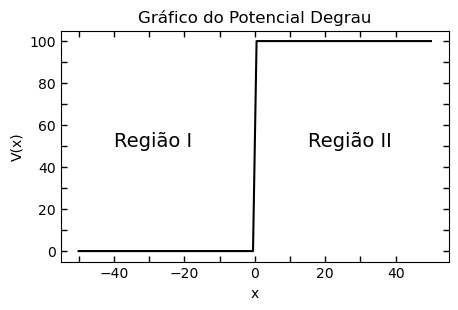

In [19]:
x = np.linspace(-50, 50, 100)
V = np.zeros(100)

for i in range(100):
    if x[i]<0:
        V[i] = 0
    else:
        V[i] = 100
        
plot_ticks(x, V, 10)
plt.plot(x, V, color = "black")

plt.text(-40, 50, "Região I", fontsize = 14)
plt.text(15, 50, "Região II", fontsize = 14)

plt.title("Gráfico do Potencial Degrau")
plt.xlabel("x")
plt.ylabel("V(x)")

em o nosso potencial é definido da seguinte forma

$$  {\begin{cases}
        V(x) = 0, \ para \ x<0\\
        \\
        V(x) = V_0, \ para \ x > 0 \\
        \end{cases}
        } \ .$$

$\quad$ Com isso, começaremos pela equação de Schrödinger independente do tempo

$$ \frac{d^2\psi(x)}{dx^2} + \frac{2m}{\hbar^2}(E - V(x))\psi(x) = 0 \ . \tag{2.1}$$

$\quad$ Na região I, onde $V(x) = 0$, a Equação **(2.1)** ficará assim

$$ \frac{d^2\psi(x)}{dx^2} + \frac{2m}{\hbar^2}E\psi(x) = 0$$

$$\implies \frac{d^2\psi(x)}{dx^2} = -\frac{2mE}{\hbar^2}\psi(x)$$

a solução dessa equação é $\psi(x) = Ae^{ik_1x} $, em que $A$ é amplitude da solução e $k_1 = \sqrt{\frac{2mE}{\hbar^2}}$. E essa é o nosso pacote de onda que atinge o potencial degrau.

$$\psi_i(x) = Ae^{ik_1x} \tag{2.2} \ .$$

$\quad$ Sabendo que o pacote de onda refletido viaja em na direção negativa, podemos definir esse pacote de onda como

$$\psi_R(x) = Be^{-ik_1x} \tag{2.3} \ ,$$

note que o sinal no expoente está negativo, isso porque o pacote de onda refletido é contrária a incidente.

$\quad$ Em seguida, na região II a Equação **(2.1)** terá a seguinte forma,

$$ \frac{d^2\psi(x)}{dx^2} + \frac{2m}{\hbar^2}(E - V_0)\psi(x) = 0,$$

a solução geral dessa equação é

$$\psi_T(x) = Ce^{ik_2x} \tag{2.4} \ ,$$

no qual, $\psi_T$ é o pacote de onda transmitida e $k_2 = \sqrt{\frac{2m}{\hbar^2} (E - V_0)}$.

$\quad$ Para que essas soluções sejam desse caso, elas devem obedecer as seguintes condições de contorno (condições de continuidade):
$$  {\begin{cases}
        \psi_i(0) + \psi_R(0) = \psi_T(0)\\
        \\
        \frac{d\psi_i}{dx}|_{x=0} + \frac{d\psi_R}{dx}|_{x=0} = \frac{d\psi_T}{dx}|_{x=0} \\
        \end{cases}
        } \ .$$

$\quad$ Expandindo as condições de contorno temos,
$$  {\begin{cases}
        A + B = C \\
        \\
        k_1A - k_1B = k_2C \implies A - B = \frac{k_2}{k_1}C \\
        \end{cases}
        } \ .$$

$\quad$ Faremos a seguir algumas manipulações algébricas para por a amplitude $C$ em função da amplitude $A$. Assim, somando essas duas equações, logo

$$ 2A = C + \frac{k_2}{k_1}C $$

$$ \implies 2A = ( 1 + \frac{k_2}{k_1})C \implies 2A = \frac{k_1 + k_2}{k_1}C $$

$$ \implies C = \frac{2k_1}{k_1 + k_2}A \ . \tag{2.5}$$

$\quad$ Este resultado será importante para determinarmos a probabilidade da onda ser transmitida, pois para determinar esse valor usaremos a seguinte relação,

$$ T = \frac{|C|^2}{|A|^2} \ . \tag{2.6}$$

$\quad$ Substituindo as Equação **(2.5)** na **(2.6)**, teremos

$$ T = |\frac{2k_1}{k_1 + k_2}A|^2\frac{1}{|A|^2}$$

$$ \implies T = \frac{2|k_1|^2}{|k_1 + k_2|^2}\frac{|A|^2}{|A|^2}$$

$$ \implies T = \frac{2|k_1|^2}{|k_1 + k_2|^2} \ ,$$

trocando $k_1 = \sqrt{\frac{2mE}{\hbar^2}}$ e $k_2 = \sqrt{\frac{2m}{\hbar^2}(E - V_0)}$, na equação acima, teremos

$$ T = \frac{2|\sqrt{\frac{2mE}{\hbar^2}}|^2}{|\sqrt{\frac{2mE}{\hbar^2}} + \sqrt{\frac{2m}{\hbar^2}(E - V_0)}|^2} $$

$$ \implies T = 2\frac{|\sqrt{\frac{2m}{\hbar^2}}|^2|\sqrt{E}|^2}{|\sqrt{\frac{2m}{\hbar^2}}|^2|\sqrt{E} + \sqrt{(E - V_0)}|^2} $$

$$ \therefore \boxed{ T = \frac{2|\sqrt{E}|^2}{|\sqrt{E} + \sqrt{(E - V_0)}|^2}} \ . \tag{2.7}$$

$\quad$ Com essa equação podemos determinar a solução para cada valor de $E$ que pormos.

### 2.2 Aplicação Numérica

$\quad$ Encontraremos agora as soluções para o nosso problema. O algoritmo a ser montado é de certa forma simples. Basta aplicar a Equação **(2.7)** que encontraremos as soluções. Definiremos $V_0 = 100$ e veremos a variação de $T$ com $0 \leq E \leq 200$.

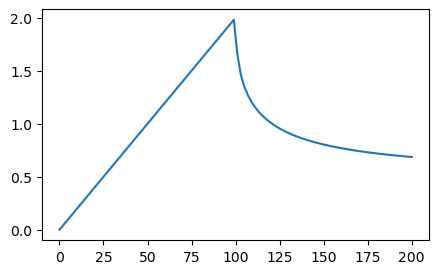

In [26]:
E = np.linspace(0, 200, 100) #valores das energias
V = 100
T = np.zeros(100)
for i in range(100):
    temp1 = 2*abs(np.sqrt(E[i]))**2
    if E[i] < V:
        temp2 = abs(np.sqrt(E[i]) + complex(0,1)*np.sqrt(V - E[i]))**2
    else:
        temp2 = abs(np.sqrt(E[i]) + np.sqrt(E[i] - V))**2
    T[i] = temp1/temp2

plt.figure(figsize = (5, 3))
plt.plot(E, T)

In [33]:
def k(E, x):
    h = 1
    m = 1
    V = 0
    if x>0 and x<1:
        V = 100
    return 2*m*(E - V)/(h**2)

def eq_rec(E, delta, x, psi, i):
    temp1 = 2*(1-(5*(delta**2)/12)*k(E, x[i-1]))*psi[i-1]
    temp2 = (1+ (delta**2/12)*k(E, x[i-2]))*psi[i-2]
    temp3 = 1 + (delta**2/12)*k(E, x[i-1]+delta)
    return (temp1 - temp2)/temp3

In [28]:
def psi_norm(psi, a, b):
    N = len(psi)
    h = abs(b-a)/N
    x = np.linspace(a, b, N)
    s_p, s_i = 0, 0
    s_0 = abs(psi[0])**2 + abs(psi[N-1])**2
    for i in range(1, N-1):
        if i%2 == 0:
            s_p += abs(psi[i])**2
        else:
            s_i += abs(psi[i])**2
    S_f = h*(s_0 + 2*s_p + 4*s_i)/3

    A = np.sqrt(1/S_f)
    psi_n = A*psi
    return psi_n, A

In [29]:
def fpsi_i(E, a, b):
    x = np.linspace(a, b, 1000)
    delta = abs(x[1] - x[0])
    
    psi_i = np.zeros(len(x))
    psi_i[0] = 0
    psi_i[1] = delta
    
    for i in range(2, len(x)):
        psi_i[i] = eq_rec(E, delta, x, psi_i, i)
    return psi_i, x

In [30]:
def fint(psi, x_l, a, b):
    N = len(psi)
    h = abs(b-a)/N
    x = np.linspace(a, b, N)
    s_p, s_i = 0, 0
    s_0 = abs(psi[N-1])**2 + abs(psi[0])**2

    for i in range(1, N-1):
        if i%2 == 0:
            s_p += abs(psi[i])**2
        else:
            s_i += abs(psi[i])**2
    S_f = h*(s_0 + 2*s_p + 4*s_i)/3
    return S_f

In [35]:
T = np.zeros(100)
E = np.linspace(0, 200, 100)
for i in range(len(E)):
    psi_i, x_i = fpsi_i(E[i], -1, 0)
    psi_i, A = psi_norm(psi_i, -1, 0)
    
    temp1 = 2*np.sqrt(E[i])
    if E[i] < V:
        temp2 = np.sqrt(E[i]) + complex(0,1)*np.sqrt(V - E[i])
    else:
        temp2 = np.sqrt(E[i]) + np.sqrt(E[i] - V)
    C = temp1/temp2
    T[i] = abs(C)**2/abs(A)**2

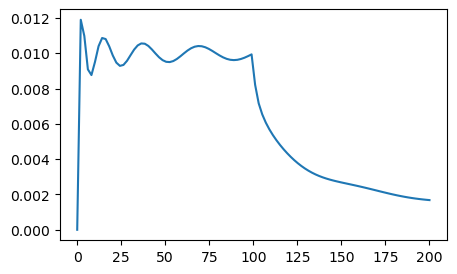

In [36]:
plt.figure(figsize = (5, 3))
plt.plot(E, T)

## 3. Potencial Barreira

$\quad$ Para trabalharmos nesse problema, imaginemos uma partícula livre, viajando da direita para a esquerda, com energia $E$ em uma região I ($x \leq 0$), em $0<x\leq a$ é a região II, onde há ação de potencial $V = V_0$. Na Mecânica Clássica, as duas possibilidades de resultados, caso $E<V_0$ a partícula é refletida, ela não consegue ir para a região II, entretanto, se $E>V_0$ ela consegue passar para a outra região. Em contrapartida, na Mecânica Quântica, se $E<V_0$ existe probabilidade da partícula passar para a região II, esse fenômeno é chamado de Tunelamento.

$\quad$ Dito isso, para conseguirmos desenvolver o problema trocaremos a partícula por um pacote de onda $\psi_I(x)$, na qual quando atinge a barreira de potencial haverá uma onda refletida $\psi_R(x)$ e outra transmitidas $\psi_T(x)$. O problema em questão é encontrar a probabilidade de encontrar a partícula na região I ($R$) e a probabilidade de encontrar na região II ($T$), para encontrar esses dois valores basta determinar as seguintes integrais,

$$ R = \int |\psi_R|^2dx \ , \tag{1.1}$$

$$T = \int |\psi_T|^2dx \ ,\tag{1.2}$$

devemos calcula-las considerando $t \rightarrow \infty$. 

$\quad$ Em geral, $R$ e $T$ dependem diretamente do corpo da função de onda incidente. No entanto, mantendo o momento inicial bem definido, ou seja, $\Delta p \rightarrow 0$ e $\Delta x \rightarrow \infty$. Assim, o resultado dependerá apenas do valor da energia inicial **[1]**.

$\quad$ Para este problema consideraremos um potencial degrau de forma que será definido da seguinte forma

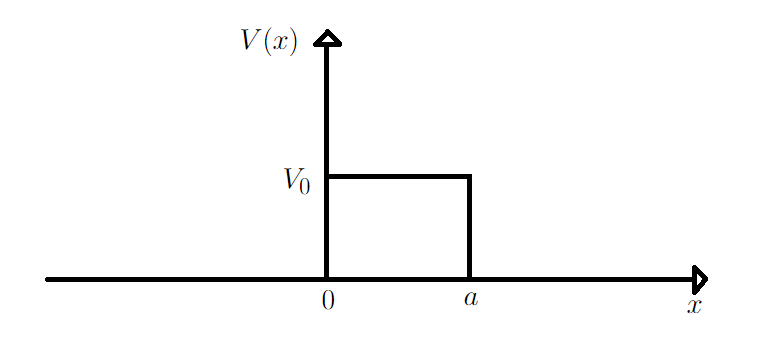

$$  {\begin{cases}
        V(x) = 0, \ para \ x<0\\
        \\
        V(x) = V_0, \ para \ 0<x<a \\
        \\
        V(x) = 0, \ para \ x>a \\
        \end{cases}
        } \ ,$$

de forma que em $x<0$ é a região I, em $0<x<a$ é a região II e em $x>a$ é a região III. Para resolver devemos começar com a equação de Schrödinger independente do tempo

$$ \frac{d^2\psi(x)}{dx^2} + \frac{2m}{\hbar^2}(E - V(x))\psi(x) = 0 \ . \tag{1.3}$$

$\quad$ A onda incidente se encontra na região I, onde $V(x) = 0$, assim a Equação **(1.3)** ficará da seguinte forma

$$ \frac{d^2\psi(x)}{dx^2} + \frac{2mE}{\hbar^2}\psi(x) = 0$$

$$ \implies \frac{d^2\psi(x)}{dx^2} = - \frac{2mE}{\hbar^2}\psi(x) \ .$$

$\quad$ A solução geral para esta EDO é $ \psi(x) = Ae^{ik_1x}$, em que $k_1 = \sqrt{\frac{2mE}{\hbar^2}}$. Com esse resultado podemos definir o a função de onda para o pacote de onda incidente e refletido. Dessa forma,

$$ \psi_I(x) = Ae^{ik_1x} \ , \tag{1.4}$$

$$ \psi_R = Be^{-ik1x} \ . \tag{1.5}$$

note que há um sinal de menos no expoente, porque a função de onda refletida será contrária à incidente.

$\quad$ Em seguida, na região II a Equação **(1.3)** ficará assim,

$$ \frac{d^2\psi(x)}{dx^2} + \frac{2m}{\hbar^2}(E - V_0)\psi(x) = 0$$

$$ \implies \frac{d^2\psi(x)}{dx^2} = -\frac{2m}{\hbar^2}(E - V_0)\psi(x) \ ,$$

a solução geral dessa EDO é $\psi(x) = Ce^{k_2x} + De^{-k_2x}$, em que $k_2 = \sqrt{\frac{2m(E - V_0)}{\hbar^2}}$. Logo

$$ \psi_{II} = Ce^{ik_2x} + De^{-ik_2x}$$

$\quad$ Como só estamos interessados na onda transmitida , a que se propaga para a direita, então podemos considerar o $D=0$ **[1]**. Assim,

$$ \psi_{II} = Ce^{ik_2x}\ . \tag{1.6}$$

$\quad$ Por fim, para a região III a Equação **(1.1)** ficará da mesma forma que para o que foi feito para região I, ou seja, possuem a mesma solução. Com isso, agora temos o pacote de onda após o tunelamento, a onda transmitida

$$ \psi_T(x) = Fe^{ik_1x} \ . \tag{1.7}$$

$\quad$ Agora aplicaremos as condições de contorno, em que em $x=0$ as funções de onda da região I e II devem ser iguais e suas derivadas em torno desse ponto também, dessa forma

$$  {\begin{cases}
        A + B = C \\
        \\
        ik_1(A - B) = ik_2C \\
        \end{cases}
        }$$

$$ \implies 2A = C + \frac{k_2}{k_1}C$$

$$\implies C= A\frac{2k_1}{k_1+k_2} \ . \tag{1.8}$$

$\quad$ Substituindo $k_1 = \sqrt{\frac{2mE}{\hbar^2}}$ e $k_2 = \sqrt{\frac{2m(E - V_0)}{\hbar^2}}$ na Equação **(1.8)** assim, logo

$$\therefore C= A\frac{2\sqrt{E}}{\sqrt{E}+\sqrt{E - V_0}} \ . \tag{1.9}$$

$\quad$ Outras condições de contorno são as mesma, mas em torno do ponto $x=a$. Em outras palavras, as funções de onda da região II e III devem ser iguais e suas derivadas em torno desse ponto também, logo

$$  {\begin{cases}
        Ce^{ik_2a} = Fe^{ik_1a}\\
        \\
        ik_2Ce^{ik_2a} = ik_1 Fe^{ik_1a} \implies Ce^{ik_2a} = \frac{k_1}{k_2} Fe^{ik_1a}\\
        \end{cases}
        } \ .$$

$$\implies  2Ce^{ik_2a} = Fe^{ik_1a} + \frac{k_1}{k_2} Fe^{ik_1a} \implies  2Ce^{ik_2a} = Fe^{ik_1a}( 1 + \frac{k_1}{k_2})$$

$$ \implies  Fe^{ik_1a}\frac{k_2 + k_1}{k_2} = 2Ce^{ik_2a}$$

$$\implies  F = 2Ce^{i(k_2 - k_1)a} \frac{k_2}{k_1 + k_2} \ ,$$

substituindo a Equação **(1.8)** no resultado acima teremos

$$ F = 2A\frac{2k_1}{k_1+k_2}e^{i(k_2 - k_1)a} \frac{k_2}{k_1 + k_2}$$

$$ \implies F = Ae^{i(k_2 - k_1)a} \frac{4k_1k_2}{(k_1 + k_2)^2}$$

$$\therefore \boxed{F = Ae^{i(\sqrt{E-V_0} - \sqrt{E})a} \frac{4\sqrt{E}\sqrt{E-V_0}}{(\sqrt{E} + \sqrt{E - V_0})^2}} \ . \tag{1.10}$$

## 2. Resolvendo Computacionalmente

$\quad$ Para solucionar computacionalmente, determinaremos as soluções da Equação **(1.1)** numericamente em cada região e para garantir que sejam são as soluções de onda que queremos. Para solucionar as EDOs, utilizaremos o método numérico de Numerov. Além disso, para facilitar nossos cálculos imaginemos que a partícula que está de movendo em direção ao potencial degrau tem massa igual 1 e a constante de planck igual a 1, ou seja, $m = 1 \ kg$ e $\hbar = 1 \ J.s$.

In [27]:
def k(E, x):
    h = 1
    m = 1
    V = 0
    if x>0 and x<1:
        V = 100
    return 2*m*(E - V)/(h**2)

def eq_rec(E, delta, x, psi, i):
    temp1 = 2*(1-(5*(delta**2)/12)*k(E, x[i-1]))*psi[i-1]
    temp2 = (1+ (delta**2/12)*k(E, x[i-2]))*psi[i-2]
    temp3 = 1 + (delta**2/12)*k(E, x[i-1]+delta)
    return (temp1 - temp2)/temp3

In [4]:
def df_f(psi, x):
    delta = abs(x[0]-x[1])
    d_psi = abs(psi[len(psi) - 1] - psi[len(psi)-2])/delta
    return d_psi
def df_i(psi,x):
    delta = abs(x[0]-x[1])
    d_psi = abs(psi[1] - psi[0])/delta
    return d_psi

In [5]:
def psi_norm(psi, a, b):
    N = len(psi)
    h = abs(b-a)/N
    x = np.linspace(a, b, N)
    s_p, s_i = 0, 0
    s_0 = abs(psi[0])**2 + abs(psi[N-1])**2
    for i in range(1, N-1):
        if i%2 == 0:
            s_p += abs(psi[i])**2
        else:
            s_i += abs(psi[i])**2
    S_f = h*(s_0 + 2*s_p + 4*s_i)/3

    A = np.sqrt(1/S_f)
    psi_n = A*psi
    return psi_n, A

In [6]:
def fpsi_i(E, a, b):
    x = np.linspace(a, b, 1000)
    delta = abs(x[1] - x[0])
    
    psi_i = np.zeros(len(x))
    psi_i[0] = 0
    psi_i[1] = delta
    
    for i in range(2, len(x)):
        psi_i[i] = eq_rec(E, delta, x, psi_i, i)
    return psi_i, x

def fpsi_II(E, a, b, psi_i):
    x = np.linspace(a, b, 1000)
    delta = abs(x[1] - x[0])
    
    psi_II = np.zeros(len(x))
    if E < 10:
        psi_II[0] = 0
        psi_II[1] = -delta
    else:
        psi_II[0] = 0
        psi_II[1] = delta
    for i in range(2, len(x)):
        psi_II[i] = eq_rec(E, delta, x, psi_II, i)
    psi_II = psi_II + psi_i[len(psi_i)-1]
    return psi_II, x

def fpsi_T(E, a, b, psi_II):
    x = np.linspace(a, b, 1000)
    delta = abs(x[1] - x[0])
    psi_T = np.zeros(len(x))
    if psi_II[len(psi_II)-1] > psi_II[len(psi_II)-2]:
        psi_T[0] = 0
        psi_T[1] = delta 
    else:
        psi_T[0] = 0
        psi_T[1] = -delta 
    for i in range(2, len(x)):
        psi_T[i] = eq_rec(E, delta, x, psi_T, i)
    psi_T = psi_T + psi_II[len(psi_II)-1]
    return psi_T, x

In [7]:
def fint(psi, x_l, a, b):
    N = len(psi)
    h = abs(b-a)/N
    x = np.linspace(a, b, N)
    s_p, s_i = 0, 0
    s_0 = abs(psi[N-1])**2 + abs(psi[0])**2

    for i in range(1, N-1):
        if i%2 == 0:
            s_p += abs(psi[i])**2
        else:
            s_i += abs(psi[i])**2
    S_f = h*(s_0 + 2*s_p + 4*s_i)/3
    return S_f

In [174]:
a = 0.5
V = 100

In [175]:
T = []
R = []
temp = np.linspace(0, 200, 1000)
for i in range(len(temp)):
    E = temp[i]
    psi_i, x_i = fpsi_i(E, -1, 0)
    psi_i, A = psi_norm(psi_i, -1, 0)
    if E<V:
        temp1 = A*np.exp(complex(0, 1)*(np.sqrt(V - E)*complex(0,1) - np.sqrt(E))*a)
        temp2 = 4*np.sqrt(E)*np.sqrt(V - E)*complex(0,1)/((np.sqrt(V - E)*complex(0,1) + np.sqrt(E))**2)
        F = temp1*temp2
    else:
        temp1 = A*np.exp(complex(0, 1)*(np.sqrt(E - V) - np.sqrt(E))*a)
        temp2 = 4*np.sqrt(E)*np.sqrt(E - V)/((np.sqrt(E - V) + np.sqrt(E))**2)
        F = temp1*temp2
    T.append(abs(F)**2/abs(A)**2)
    R.append(1-abs(F)**2/abs(A)**2)

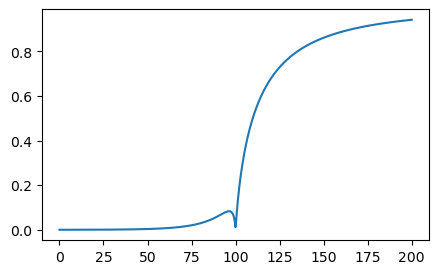

In [176]:
plt.figure(figsize=(5,3))
plt.plot(temp,T)
#plt.plot(temp,R)

## Acoplando a variação no tempo

$$ \phi(t) = e^{-iEt/\hbar}$$

In [149]:
T = []
R = []

E = 230
t = np.linspace(0, 1, 100)
for i in range(len(t)):
    psi_i, x_i = fpsi_i(E, -1, 0)
    psi_i, A = psi_norm(psi_i, -1, 0)
    psi_i = psi_i*np.exp(-complex(0, 1)*E*t[i])
    if E<V:
        temp1 = A*np.exp(complex(0, 1)*(np.sqrt(V - E)*complex(0,1) - np.sqrt(E))*a)
        temp2 = 4*np.sqrt(E)*np.sqrt(V - E)*complex(0,1)/((np.sqrt(V - E)*complex(0,1) + np.sqrt(E))**2)
        F = temp1*temp2
    else:
        temp1 = A*np.exp(complex(0, 1)*(np.sqrt(E - V) - np.sqrt(E))*a)
        temp2 = 4*np.sqrt(E)*np.sqrt(E - V)/((np.sqrt(E - V) + np.sqrt(E))**2)
        F = temp1*temp2
    x_T = np.linspace(a, 2, 1000)
    psi_T = F*np.exp(-complex(0, 1)*E*t[i])*np.exp(complex(0, 1)*np.sqrt(2*E)*x_T)
    
    T.append(fint(psi_T, x_T, a, 2))
    R.append(1-fint(psi_T, x_T, a, 2))
    

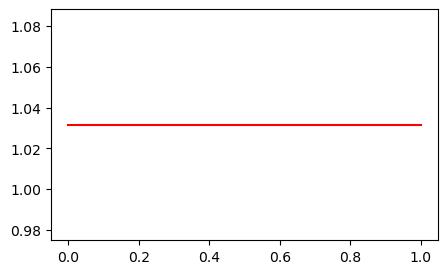

In [150]:
plt.figure(figsize=(5,3))
plt.plot(t,T, "r")

---

## Referências

**[1]** SAKURAI, J. J.; NAPOLITANO, J. MECâNICA QUÂNTICA MODERNA. [s.l.]: Pearson Education, 2013.

**[2]** SHANKAR, R. Principles of Quantum Mechanics. [s.l.]: Springer Science, 1994.

**[3]** RIBEIRO, M. A. C. et al. Os problemas de espalhamento quântico em potenciais elementares. Revista Brasileira de Ensino de Física, [s.l.], no 1, 2004. DOI: https://doi.org/10.1590/s1806-11172004000100001.

**[4]** SAFNE DE SOUZA SILVA, P.; PEREIRA DA SILVA, L. F. Uma Abordagem Didática Do Tunelamento quântico: a Partir Do Estudo Da Barreira Potencial Retangular Simples. Revista Física No Campus, [s.l.], no 2, 2023.